In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from pandas_profiling import profile_report
from sklearn.metrics import r2_score,mean_absolute_error
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv('Pune_rent.csv')

In [3]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22800 non-null  object
 1   bedroom        22800 non-null  int64 
 2   layout_type    22800 non-null  object
 3   property_type  22800 non-null  object
 4   locality       22800 non-null  object
 5   price          22800 non-null  object
 6   area           22800 non-null  int64 
 7   furnish_type   22800 non-null  object
 8   bathroom       22629 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB


In [5]:
df.shape

(22800, 9)

In [6]:
df.describe()

,bedroom,area
count,22800.000000,22800.000000
mean,1.873465,1041.622588
std,0.793189,588.915990
min,1.000000,100.000000
25%,1.000000,650.000000
50%,2.000000,960.000000
75%,2.000000,1200.000000
max,8.000000,7500.000000


In [7]:
for column in df.columns:
    print(df[column].value_counts())
    print("*"*20)

AGENT      16271
OWNER       6097
BUILDER      432
Name: seller_type, dtype: int64
********************
2    10612
1     7925
3     3566
4      626
5       66
6        3
8        2
Name: bedroom, dtype: int64
********************
BHK    21726
RK      1074
Name: layout_type, dtype: int64
********************
Apartment            20172
Studio Apartment      1074
Independent House      912
Independent Floor      353
Villa                  278
Penthouse               11
Name: property_type, dtype: int64
********************
Wagholi           2169
Hinjewadi         1457
Wakad             1259
Kharadi           1220
Hadapsar          1135
                  ... 
Sindhi Colony        1
Kalwad               1
Baderaj Colony       1
Marunji Road         1
Aundh Gaon           1
Name: locality, Length: 459, dtype: int64
********************
15,000    1241
18,000    1156
12,000    1089
20,000    1002
16,000     969
          ... 
76,843       1
1.29         1
1.17         1
1.09         1
13,250  

In [8]:
values = ['1','2','3','4','5','6']

In [9]:
df = df[df.bathroom.isin(values) == True]

In [10]:
print(df['bathroom'].value_counts())

2    11184
1     7598
3     3103
4      569
5      126
6       15
Name: bathroom, dtype: int64


In [11]:
df['bathroom'] = df['bathroom'].astype(int)

In [12]:
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2
...,...,...,...,...,...,...,...,...,...
22795,OWNER,1,BHK,Apartment,Chinchwad,"13,250",650,Semi-Furnished,1
22796,OWNER,1,RK,Studio Apartment,Wadgaon Sheri,"7,000",350,Unfurnished,1
22797,OWNER,1,BHK,Apartment,Kothrud,"8,500",389,Semi-Furnished,1
22798,AGENT,1,BHK,Apartment,Wakad,"16,500",670,Semi-Furnished,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22595 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22595 non-null  object
 1   bedroom        22595 non-null  int64 
 2   layout_type    22595 non-null  object
 3   property_type  22595 non-null  object
 4   locality       22595 non-null  object
 5   price          22595 non-null  object
 6   area           22595 non-null  int64 
 7   furnish_type   22595 non-null  object
 8   bathroom       22595 non-null  int32 
dtypes: int32(1), int64(2), object(6)
memory usage: 1.6+ MB


In [14]:
df['price'] = df['price'].astype(str).replace(',', '')

In [15]:
df['price'] = df['price'].apply(lambda x: x.replace(',','')).astype('float')

In [16]:
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750.0,450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,18000.0,916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,16500.0,1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,8000.0,250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,25000.0,1005,Semi-Furnished,2
...,...,...,...,...,...,...,...,...,...
22795,OWNER,1,BHK,Apartment,Chinchwad,13250.0,650,Semi-Furnished,1
22796,OWNER,1,RK,Studio Apartment,Wadgaon Sheri,7000.0,350,Unfurnished,1
22797,OWNER,1,BHK,Apartment,Kothrud,8500.0,389,Semi-Furnished,1
22798,AGENT,1,BHK,Apartment,Wakad,16500.0,670,Semi-Furnished,2


In [17]:
df['price'] = df['price'].astype(int)

In [18]:
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750,450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,18000,916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,16500,1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,8000,250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,25000,1005,Semi-Furnished,2
...,...,...,...,...,...,...,...,...,...
22795,OWNER,1,BHK,Apartment,Chinchwad,13250,650,Semi-Furnished,1
22796,OWNER,1,RK,Studio Apartment,Wadgaon Sheri,7000,350,Unfurnished,1
22797,OWNER,1,BHK,Apartment,Kothrud,8500,389,Semi-Furnished,1
22798,AGENT,1,BHK,Apartment,Wakad,16500,670,Semi-Furnished,2


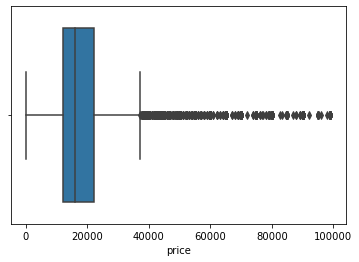

In [19]:
sns.boxplot(data=df,x='price');

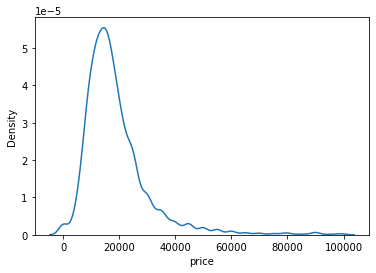

In [20]:
sns.kdeplot(df['price']);

In [21]:
a = df[df['price'] < 1000].index

In [22]:
df.drop(a,inplace=True)

In [23]:
df[df['price'] < 1000]

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom


In [24]:
indexes = df[(df['bedroom'] == 1) & (df['price'] >= 50000)].index

In [25]:
df.drop(indexes,inplace=True)

In [26]:
df.locality =df.locality.apply(lambda x : x.strip())
locationc = df.groupby('locality')['locality'].count().sort_values(ascending=False)
locationc

locality
Wagholi            2159
Hinjewadi          1442
Wakad              1250
Kharadi            1208
Hadapsar           1086
                   ... 
Nerhe                 1
Netaji Nagar          1
New DP Road           1
Nigdi Sector 26       1
wadebolhai            1
Name: locality, Length: 451, dtype: int64

In [27]:
less_than_10_location = locationc[locationc < 10]

In [28]:
df.locality = df.locality.apply(lambda x : 'other' if x in less_than_10_location else x)

In [29]:
df.locality.nunique()

130

In [30]:
df['bedroom'].unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [31]:
df['bathroom'].unique()

array([1, 2, 3, 4, 5, 6])

In [32]:
df[df.bathroom>df.bedroom + 2]

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
14285,OWNER,3,BHK,Apartment,Hinjewadi,26000,1250,Furnished,6


In [33]:
df = df[df.bathroom<df.bedroom + 2]

In [34]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750,450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,18000,916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,16500,1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,8000,250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,25000,1005,Semi-Furnished,2


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22335 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22335 non-null  object
 1   bedroom        22335 non-null  int64 
 2   layout_type    22335 non-null  object
 3   property_type  22335 non-null  object
 4   locality       22335 non-null  object
 5   price          22335 non-null  int32 
 6   area           22335 non-null  int64 
 7   furnish_type   22335 non-null  object
 8   bathroom       22335 non-null  int32 
dtypes: int32(2), int64(2), object(5)
memory usage: 1.5+ MB


In [36]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750,450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,18000,916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,16500,1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,8000,250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,25000,1005,Semi-Furnished,2


In [37]:
X = df.drop(columns=['price'])
y = df['price']

In [38]:
X

,seller_type,bedroom,layout_type,property_type,locality,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,1005,Semi-Furnished,2
...,...,...,...,...,...,...,...,...
22795,OWNER,1,BHK,Apartment,Chinchwad,650,Semi-Furnished,1
22796,OWNER,1,RK,Studio Apartment,Wadgaon Sheri,350,Unfurnished,1
22797,OWNER,1,BHK,Apartment,Kothrud,389,Semi-Furnished,1
22798,AGENT,1,BHK,Apartment,Wakad,670,Semi-Furnished,2


In [39]:
y

0         6750
1        18000
2        16500
3         8000
4        25000
         ...  
22795    13250
22796     7000
22797     8500
22798    16500
22799    12000
Name: price, Length: 22335, dtype: int32

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [41]:
X_train

,seller_type,bedroom,layout_type,property_type,locality,area,furnish_type,bathroom
13248,AGENT,1,BHK,Apartment,Katraj,550,Unfurnished,1
1594,AGENT,2,BHK,Apartment,Wakad,1050,Semi-Furnished,2
11081,AGENT,2,BHK,Apartment,Pimple Gurav,965,Semi-Furnished,2
6945,AGENT,1,BHK,Apartment,Sopan Baug,650,Unfurnished,1
14321,OWNER,1,BHK,Apartment,Dhanori,650,Semi-Furnished,1
...,...,...,...,...,...,...,...,...
1128,AGENT,2,BHK,Apartment,Hinjewadi,780,Furnished,2
19324,AGENT,1,RK,Studio Apartment,Ambegaon Budruk,500,Unfurnished,1
12034,AGENT,3,BHK,Apartment,Viman Nagar,1620,Semi-Furnished,3
6816,AGENT,1,BHK,Apartment,Hinjewadi,571,Unfurnished,1


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [43]:
ct = ColumnTransformer([('one-hot-encoder', OneHotEncoder(drop='first'), [0,2,3,4,6])], remainder='passthrough')

In [44]:
#Linear

In [45]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7842384617013666
MAE 3491.458296259739


In [46]:
#Ridge

In [47]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7833681039168685
MAE 3498.3730975828234


In [48]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7842311900765182
MAE 3491.615554253592


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239785770497.3803, tolerance: 259123640.4985817
  model = cd_fast.enet_coordinate_descent(


In [49]:
#knn

In [50]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7938843090779191
MAE 3129.5154680194964


In [51]:
#Decision tree

In [52]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7658707339652433
MAE 3586.6168780950247


In [53]:
#svm

In [54]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6304681269218674
MAE 4620.774538842208


In [55]:
#random forest

In [56]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8456391989460277
MAE 2915.89489417003


In [57]:
#Extra tree

In [58]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8493804100834405
MAE 2896.5898988048534


In [59]:
#adaboost

In [60]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6463336590863256
MAE 4986.5199165168615


In [61]:
#gradient boost

In [62]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe2.fit(X_train,y_train)

y_pred = pipe2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8362949153878235
MAE 2931.5682829162224


In [63]:
#XG boost

In [64]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.846922756233034
MAE 2891.4020719240757


In [65]:
#Voting Regressor

In [66]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.843314349750925
MAE 2980.6529723053127


In [67]:
#Stacking

In [68]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8465717406569984
MAE 2926.496182335089


In [69]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe2,open('pipe2.pkl','wb'))

In [70]:
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750,450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,18000,916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,16500,1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,8000,250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,25000,1005,Semi-Furnished,2
...,...,...,...,...,...,...,...,...,...
22795,OWNER,1,BHK,Apartment,Chinchwad,13250,650,Semi-Furnished,1
22796,OWNER,1,RK,Studio Apartment,Wadgaon Sheri,7000,350,Unfurnished,1
22797,OWNER,1,BHK,Apartment,Kothrud,8500,389,Semi-Furnished,1
22798,AGENT,1,BHK,Apartment,Wakad,16500,670,Semi-Furnished,2


In [71]:
df.to_excel(r'G:\DSML&AI\Machine learning\Pune Flat Rent with Deployment\Cleaned data.xlsx', index = False)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22335 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22335 non-null  object
 1   bedroom        22335 non-null  int64 
 2   layout_type    22335 non-null  object
 3   property_type  22335 non-null  object
 4   locality       22335 non-null  object
 5   price          22335 non-null  int32 
 6   area           22335 non-null  int64 
 7   furnish_type   22335 non-null  object
 8   bathroom       22335 non-null  int32 
dtypes: int32(2), int64(2), object(5)
memory usage: 1.5+ MB


In [80]:
df[(df['layout_type'] == 'RK') & (df['price'] > 20000)]

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
9624,AGENT,1,RK,Studio Apartment,Kothrud,21000,350,Unfurnished,1
10029,AGENT,1,RK,Studio Apartment,Viman Nagar,30000,1100,Furnished,1
10061,AGENT,1,RK,Studio Apartment,Viman Nagar,30000,1100,Furnished,1
19909,OWNER,1,RK,Studio Apartment,Loni Kalbhor,42000,350,Unfurnished,1
